In [1]:
###6.5.1 最大汇聚层和平均汇聚层
import torch
from torch import nn
from d2l import torch as d2l

def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

c:\Users\yy200\miniconda3\envs\d2l\lib\site-packages\torchvision\io\image.py:14: UserWarning: Failed to load image Python extension: '[WinError 127] 找不到指定的程序。'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [3]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

In [4]:
###6.5.2 填充和步幅
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [5]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [6]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [7]:
pool2d = nn.MaxPool2d((2, 3), stride=(2, 3), padding=(0, 1))
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [8]:
###6.5.3. 多个通道
X = torch.cat((X, X + 1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [9]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

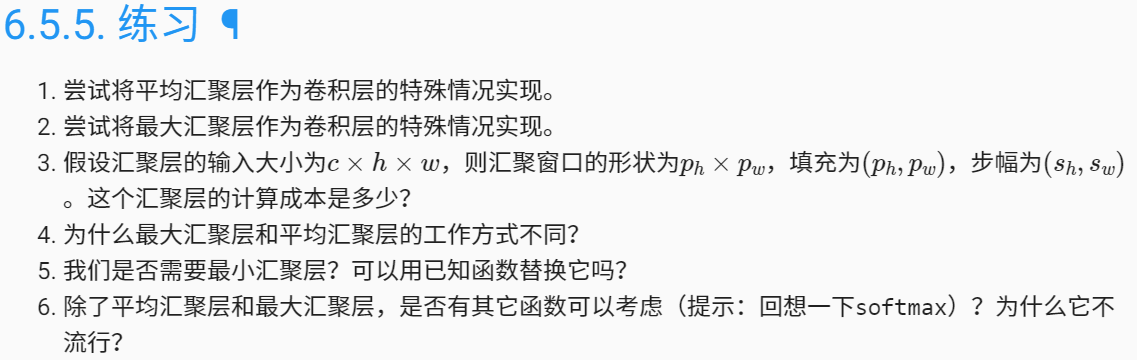
1. 平均汇聚层作为卷积层的特殊情况可以通过将卷积核的权重设置为相同的值来实现。例如，对于一个大小为 $k \times k$ 的卷积核，权重可以设置为 $\frac{1}{k^2}$。
2. 最大汇聚层作为卷积层的特殊情况可以通过将卷积核的权重设置为一个大的正数和一个大的负数来实现。例如，对于一个大小为 $k \times k$ 的卷积核，权重可以设置为一个大的正数和一个大的负数。
3. 假设汇聚层的输入大小为 $c \times h \times w$，则汇聚窗口的形状为 $p_h \times p_w$，填充为 $(p_h, p_w)$，步幅为 $(s_h, s_w)$。这个汇聚层的计算成本为：
$$
    [
    \frac{(h - p_h + 2 \times p_h)}{s_h} \times \frac{(w - p_w + 2 \times p_w)}{s_w} \times c \times p_h \times p_w
    ]
$$
4. 最大汇聚层和平均汇聚层的工作方式不同是因为最大汇聚层选择局部区域中的最大值，而平均汇聚层计算局部区域的平均值。
5. 我们是否需要最小汇聚层？可以用已知函数替换它吗？最小汇聚层并不常用，因为它选择局部区域中的最小值，这在大多数情况下并不有用。可以用负号和最大汇聚层来替换它。
6. 除了平均汇聚层和最大汇聚层，是否有其它函数可以考虑（提示：回想一下softmax）？为什么它不流行？其他函数如softmax可以考虑，但它不流行是因为计算复杂度较高且不具备平移不变性。